In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

batch_size = 128
num_classes = 10
epochs = 4

In [14]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 839s 14ms/step - loss: 0.2377 - acc: 0.9271 - val_loss: 0.0496 - val_acc: 0.9829
Epoch 2/4
60000/60000 [==============================] - 829s 14ms/step - loss: 0.0785 - acc: 0.9764 - val_loss: 0.0371 - val_acc: 0.9876
Epoch 3/4
60000/60000 [==============================] - 823s 14ms/step - loss: 0.0592 - acc: 0.9825 - val_loss: 0.0329 - val_acc: 0.9888
Epoch 4/4
60000/60000 [==============================] - 817s 14ms/step - loss: 0.0469 - acc: 0.9859 - val_loss: 0.0359 - val_acc: 0.9888


In [21]:
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)


Test loss: 3.5911469884634424
Test accuracy: 98.88


<function matplotlib.pyplot.show(*args, **kw)>

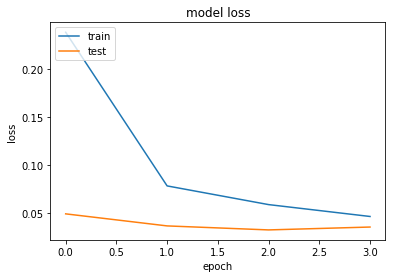

In [26]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show


In [116]:
W = model.layers[1].get_weights()[0]
W1= model.layers[1].get_weights()[0]
W2=model.layers[2].get_weights()[0]


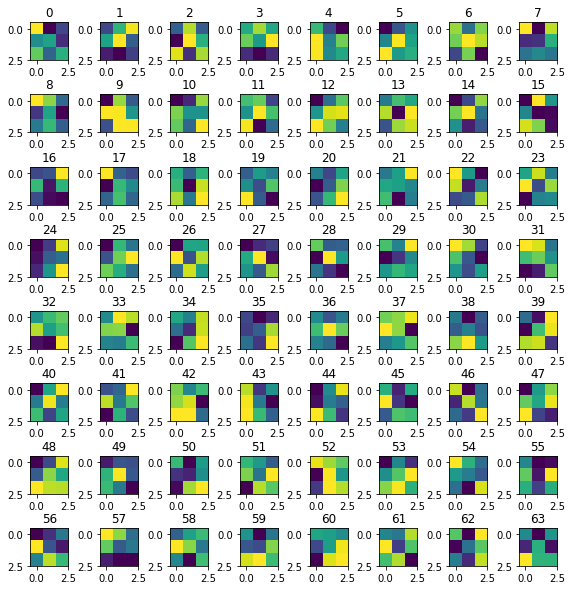

In [175]:
W = model.layers[1].get_weights()[0]
if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(8,8, figsize=(10,10))
        fig.subplots_adjust(hspace = .9, wspace=.01)
        axs = axs.ravel()
        for i in range(64):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

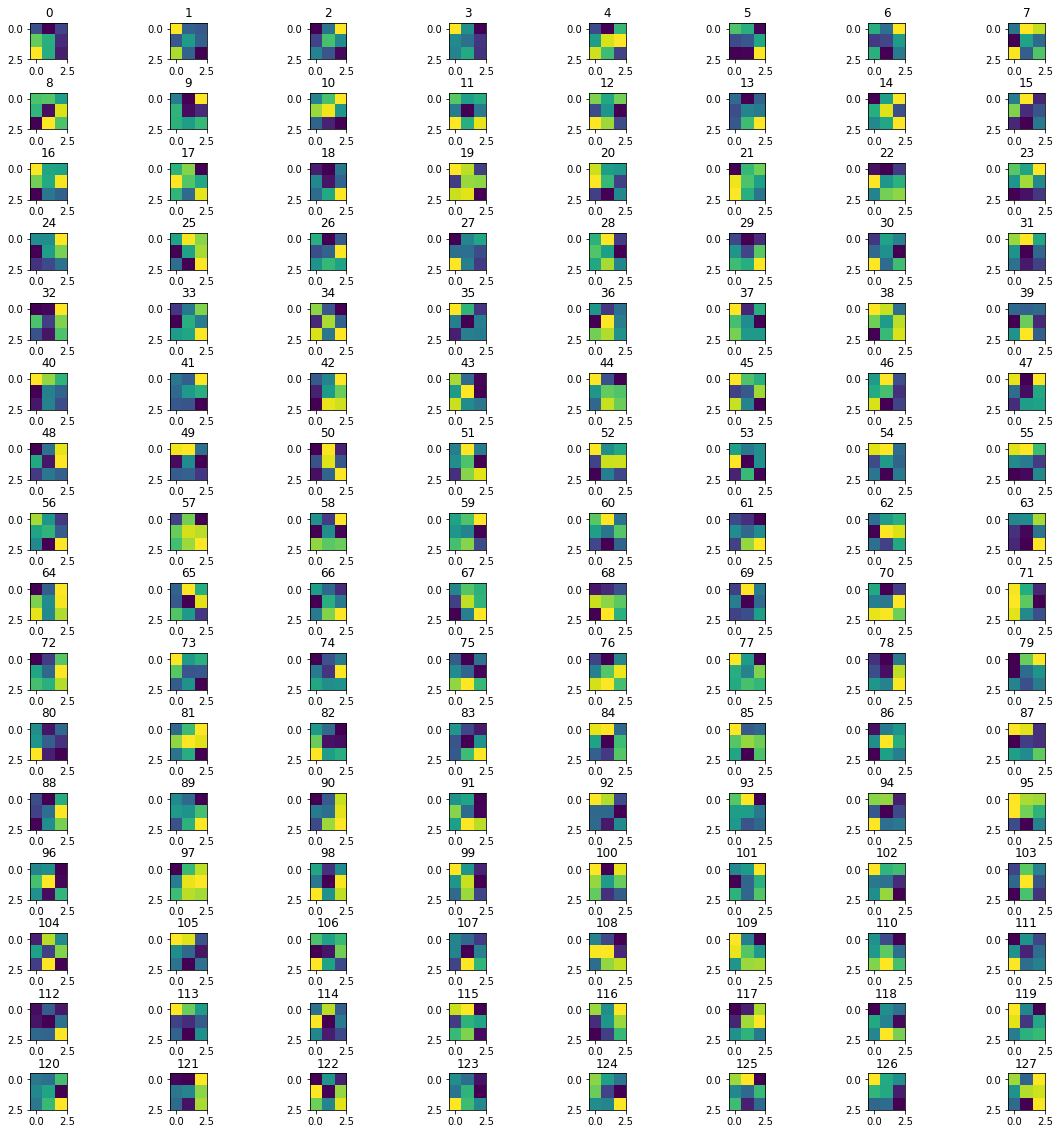

In [177]:
W = model.layers[2].get_weights()[0]
if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(16,8, figsize=(20,20))
        fig.subplots_adjust(hspace = .9, wspace=.01)
        axs = axs.ravel()
        for i in range(128):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

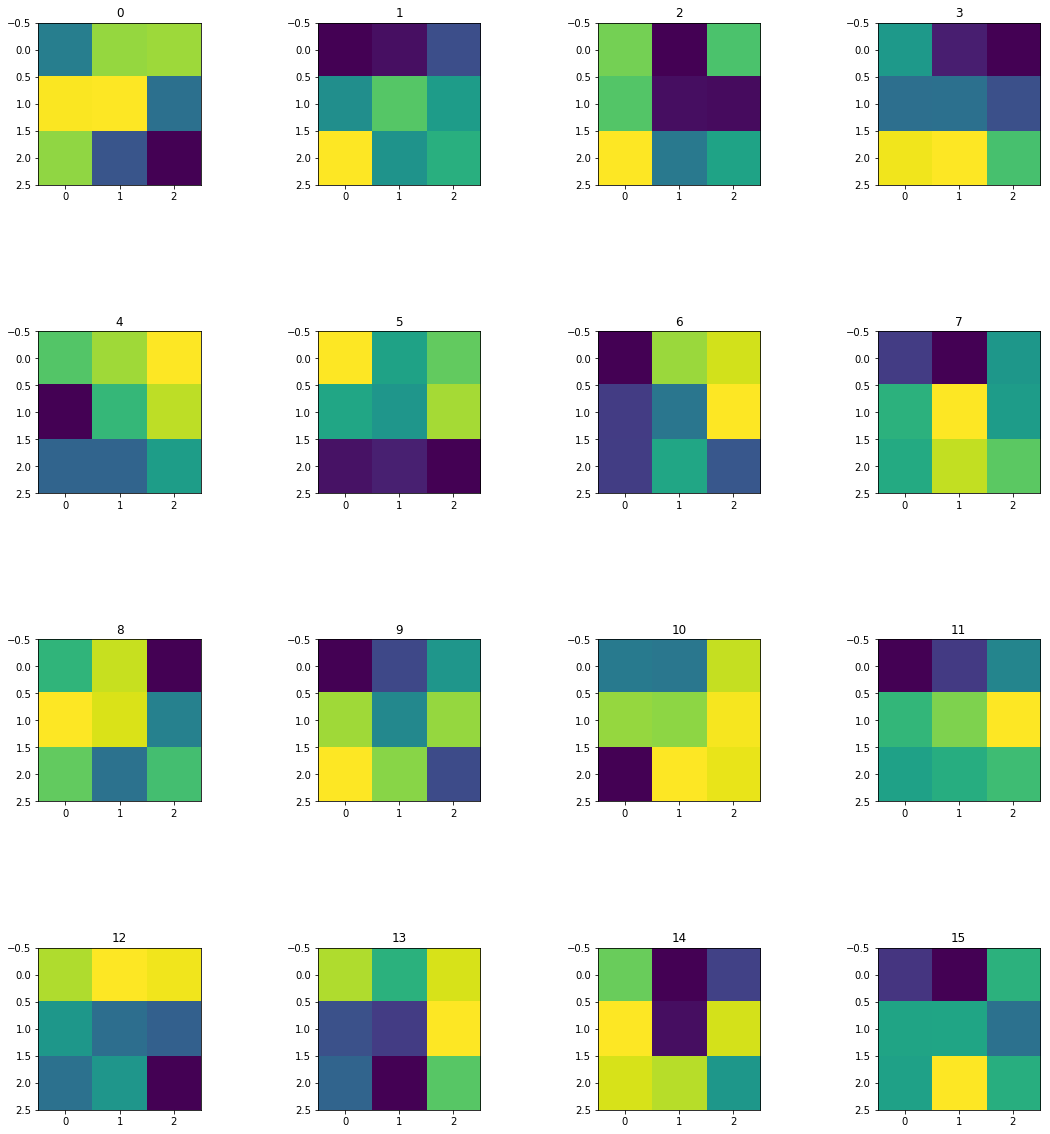

In [181]:
W = model.layers[0].get_weights()[0]
if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2])) 
        fig, axs = plt.subplots(4,4, figsize=(20,20))
        fig.subplots_adjust(hspace = .9, wspace=.01)
        axs = axs.ravel()
        for i in range(16):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

Index 600 and Index 800 of test data contains index of 6 and 8 respectively
avg=(x_test[600]+x_test[800])/2.0
28


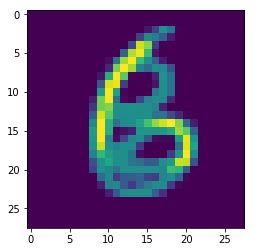

In [221]:
import matplotlib.image as mpimg
print('Index 600 and Index 800 of test data contains index of 6 and 8 respectively')
print('avg=(x_test[600]+x_test[800])/2.0');
avg=(x_test[600]+x_test[800])/2.0;
print(len(avg))

imgplot = plt.imshow(np.reshape(avg,(28,28)))


In [231]:
avg=avg.reshape([-1,28, 28,1])
print(model.predict(avg))

[[7.3209610e-03 2.4630863e-05 2.5311543e-04 1.5037035e-04 1.4076816e-03
  2.7101743e-03 9.2687869e-01 1.7450062e-05 6.0946703e-02 2.9022095e-04]]


In [232]:
print('You can see from the above array my model predicted 6 for avearger of 6 and 8');

You can see from the above array my model predicted 6 for avearger of 6 and 8
